# Comparison of Regression Models on Housing Prices in Ames, Iowa

This machine learning system is able to predict the housing prices in Ames,Iowa. The Iowa Housing dataset that was used to train this model can be found here: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview Since this model is a Regression Task, the perfamnce will be measured through RMSE. This model will be able to benefit users needing to predict housing market trends based on common housing set data. They should be able to see if it is a reliable or unreliable time to buy/sell their house and make a more informed decision. This is a 10 day project, which means the model created will not be perfect, but the Generalization gap will try to be minimal.

In [ ]:
from io import IncrementalNewlineDecoder
import sklearn
import numpy as np
import os

np.random.seed(69)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)


## Step 1: Load the Data

In [ ]:
import pandas as pd

def loadIowaHousingData():
  housing = pd.read_csv('/train.csv')
  return housing

housing = loadIowaHousingData()
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


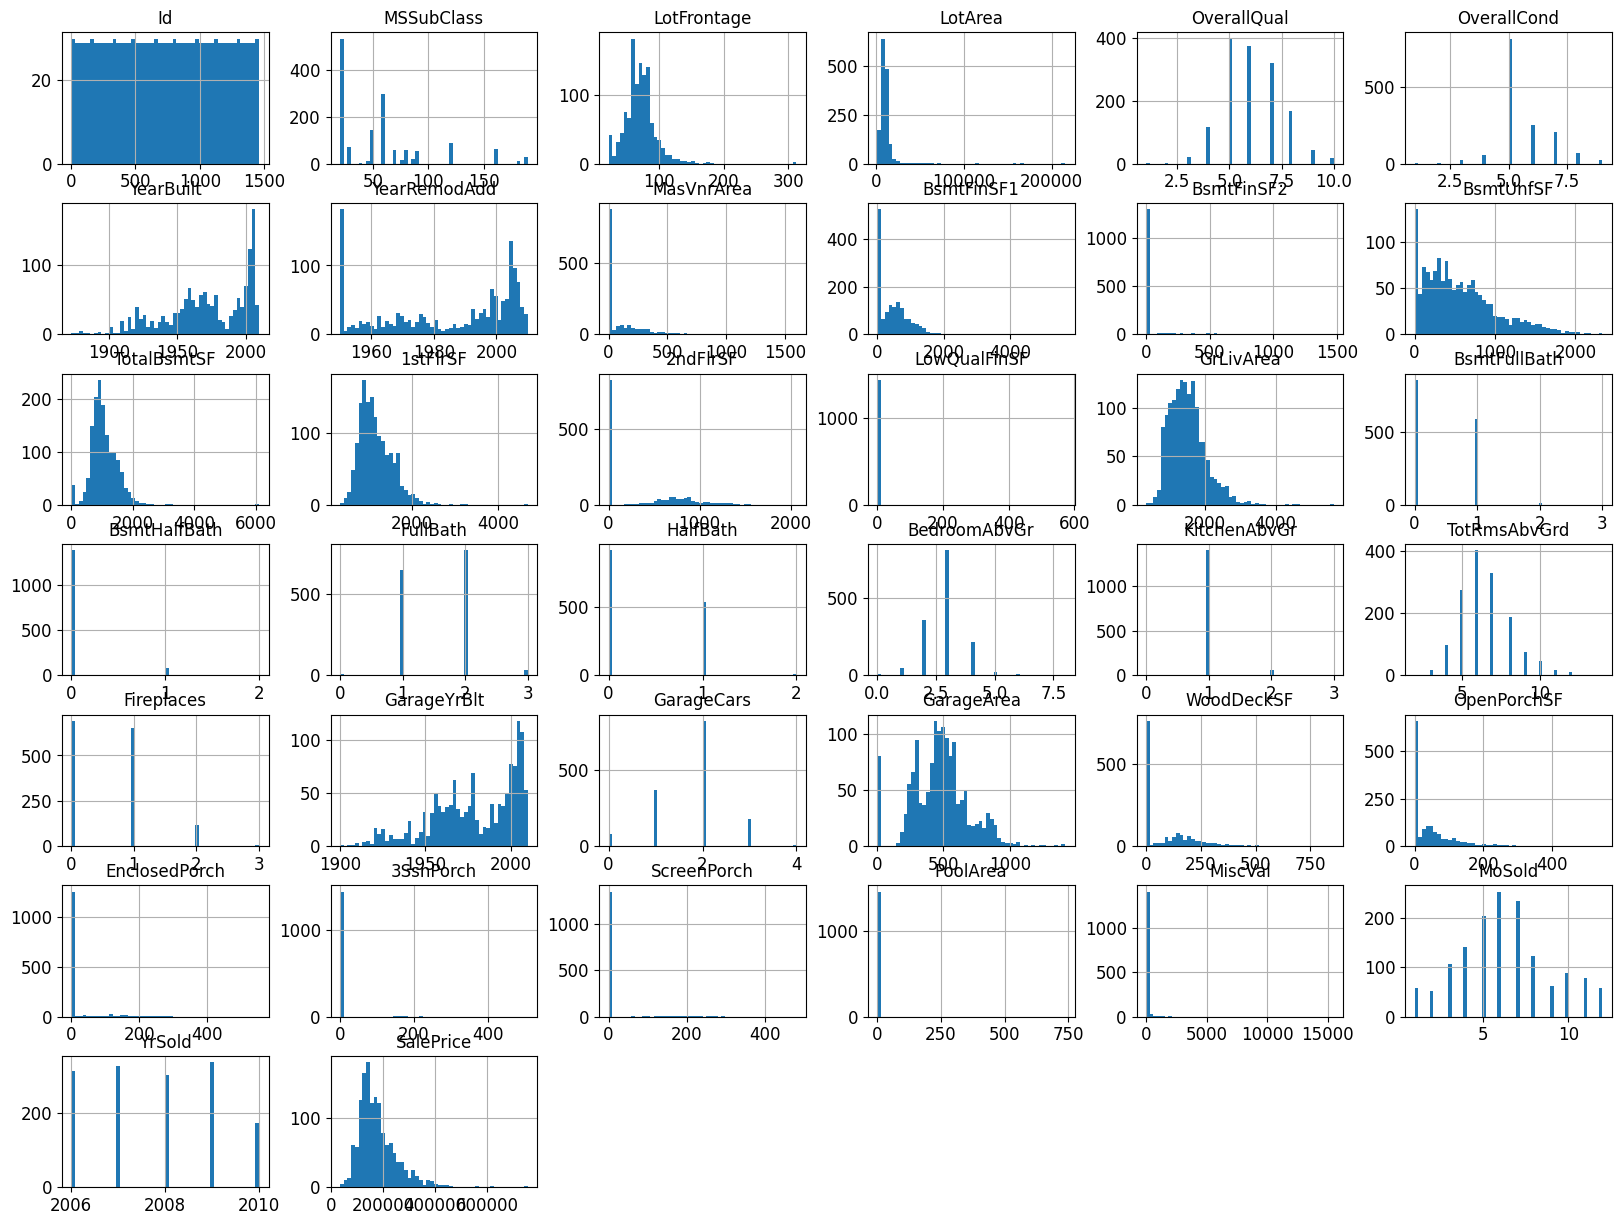

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
train_set = housing;
print (train_set.shape )

(1460, 81)


<Axes: >

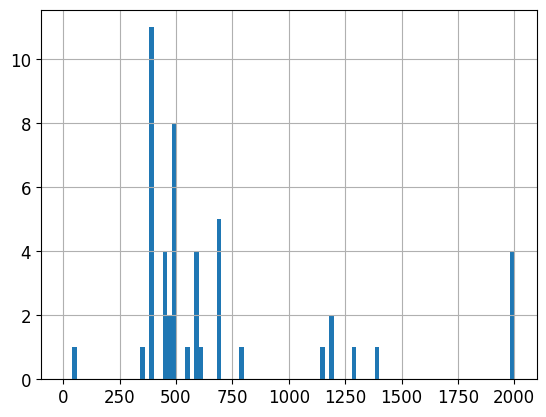

In [ ]:
housing["MiscVal"].hist(bins=100, range=(1,2000))

## Step 2. Discover and visualize the data to gain insights

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape

<ipython-input-10-591c6c82d5ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


(38, 38)

In [ ]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xla

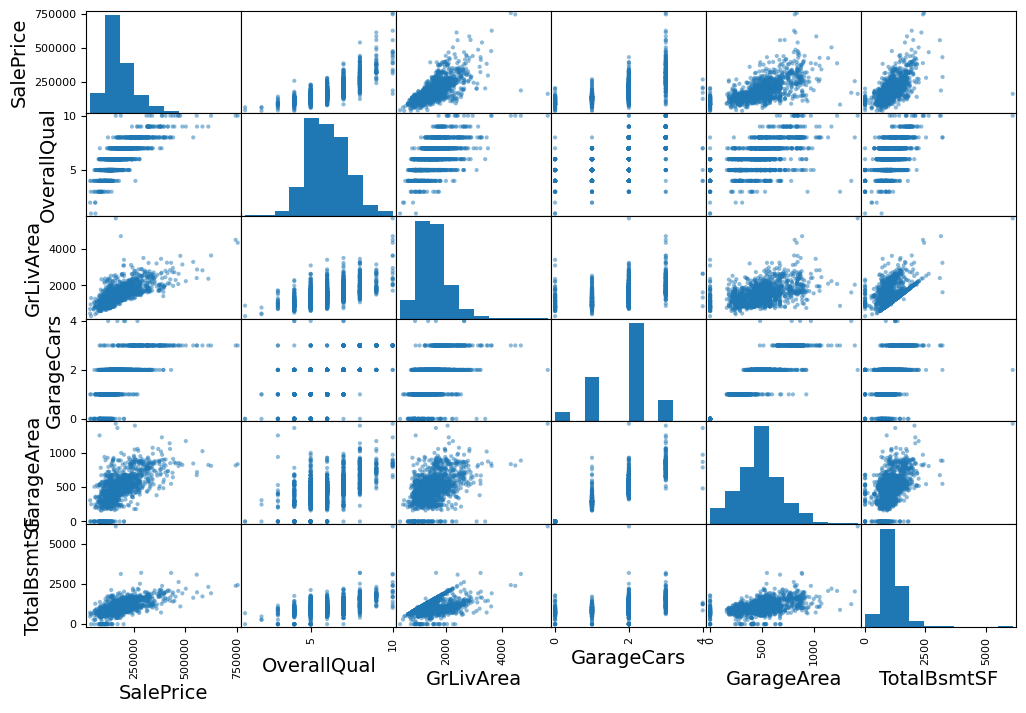

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]
scatter_matrix(housing[attributes], figsize=(12, 8))

##  Step 3: Data Preparation and Cleaning

In [ ]:
from sklearn.model_selection import train_test_split
other_set, test_set = train_test_split(housing, test_size=0.2, random_state=69)
train_set, validation_set = train_test_split(other_set, test_size=0.2, random_state=69)

print( train_set.shape )
print( test_set.shape )
print( validation_set.shape )

housing = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows


(934, 81)
(292, 81)
(234, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
561,562,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1053,1054,20,RL,68.0,8562,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
816,817,20,RL,NaN,11425,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
694,695,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop(["SaleCondition", "SaleType", "MiscFeature", "Fence","PoolQC", "PavedDrive", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "FireplaceQu", "Functional", "KitchenQual", "Electrical", "CentralAir", "HeatingQC", "Heating", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtQual", "Foundation", "ExterCond", "ExterQual", "MasVnrType", "Exterior2nd", "Exterior1st", "RoofMatl", "RoofStyle", "HouseStyle", "BldgType", "Condition1", "Condition2", "Neighborhood", "LandSlope", "LotConfig", "Utilities", "LandContour", "LotShape", "Alley", "Street", "MSZoning"], axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([7.4650e+02, 5.0000e+01, 6.8000e+01, 9.4025e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.6650e+02,
       0.0000e+00, 4.7500e+02, 9.9000e+02, 1.0810e+03, 0.0000e+00,
       0.0000e+00, 1.4615e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9795e+03, 2.0000e+00, 4.7400e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [ ]:
housing_num.median().values

array([7.4650e+02, 5.0000e+01, 6.8000e+01, 9.4025e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.6650e+02,
       0.0000e+00, 4.7500e+02, 9.9000e+02, 1.0810e+03, 0.0000e+00,
       0.0000e+00, 1.4615e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9795e+03, 2.0000e+00, 4.7400e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [ ]:
X = imputer.transform(housing_num)
print(X)

[[ 562.   20.   77. ...    0.    4. 2006.]
 [1054.   20.   68. ...    0.    5. 2010.]
 [ 817.   20.   68. ...    0.    7. 2006.]
 ...
 [ 135.   20.   78. ...    0.    7. 2006.]
 [1220.  160.   21. ...    0.    4. 2006.]
 [1322.   20.   68. ...    0.    7. 2008.]]


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
561,562.0,20.0,77.0,10010.0,5.0,5.0,1974.0,1975.0,0.0,1071.0,...,418.0,240.0,38.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1053,1054.0,20.0,68.0,8562.0,5.0,6.0,1957.0,2002.0,145.0,383.0,...,364.0,116.0,78.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
816,817.0,20.0,68.0,11425.0,5.0,6.0,1954.0,1954.0,0.0,486.0,...,275.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,7.0,2006.0
195,196.0,160.0,24.0,2280.0,6.0,6.0,1976.0,1976.0,0.0,566.0,...,440.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
694,695.0,50.0,51.0,6120.0,5.0,6.0,1936.0,1950.0,0.0,0.0,...,576.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_prepared = housing_num_tr

In [ ]:
print(housing.shape)
print(housing_prepared.shape)

(934, 80)
(934, 37)


## Step 4: Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

31735.500786750174

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=69)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [42686.20325374 50604.98022283 45541.93231347 32410.37341506
 49012.77695739]
Mean: 44051.25323249873
Standard deviation: 6436.825671516541


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [43779.04367647 33368.79846236 27965.02768394 27572.54453749
 39261.92351587]
Mean: 34389.46757522623
Standard deviation: 6335.465244348414


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=69)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11884.015526389127

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [37556.03418452 30806.17026931 28980.07995453 24397.46743822
 35084.09579105]
Mean: 31364.76952752271
Standard deviation: 4619.680114509304


In [ ]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()

count        5.000000
mean     31364.769528
std       5164.959385
min      24397.467438
25%      28980.079955
50%      30806.170269
75%      35084.095791
max      37556.034185
dtype: float64

## Step 5: Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=69)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=69)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42874.09834525717 {'max_features': 2, 'n_estimators': 3}
36243.025817619775 {'max_features': 2, 'n_estimators': 10}
33937.98022268173 {'max_features': 2, 'n_estimators': 30}
40809.4757785345 {'max_features': 4, 'n_estimators': 3}
34635.10251108194 {'max_features': 4, 'n_estimators': 10}
32551.353018382302 {'max_features': 4, 'n_estimators': 30}
40269.33798916876 {'max_features': 6, 'n_estimators': 3}
34747.74021450906 {'max_features': 6, 'n_estimators': 10}
31408.970087953865 {'max_features': 6, 'n_estimators': 30}
35488.09377143064 {'max_features': 8, 'n_estimators': 3}
31673.64261984832 {'max_features': 8, 'n_estimators': 10}
30803.62033667549 {'max_features': 8, 'n_estimators': 30}
38880.55470225028 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
33530.59225954205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
37869.44531393034 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
33422.66491223908 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f930e97a410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f930e979870>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

30925.297999073176 {'max_features': 7, 'n_estimators': 180}
32414.396361297087 {'max_features': 5, 'n_estimators': 15}
32085.803607939564 {'max_features': 3, 'n_estimators': 72}
32721.74743750841 {'max_features': 5, 'n_estimators': 21}
30766.313238826442 {'max_features': 7, 'n_estimators': 122}
32146.4488845746 {'max_features': 3, 'n_estimators': 75}
32346.486879751876 {'max_features': 3, 'n_estimators': 88}
31247.88141823884 {'max_features': 5, 'n_estimators': 100}
32394.393889754956 {'max_features': 3, 'n_estimators': 150}
45244.50331505847 {'max_features': 5, 'n_estimators': 2}


In [ ]:
final_model = grid_search.best_estimator_

x_test = housing_num
y_test = train_set["SalePrice"].copy()

X_test_prepared = num_pipeline.transform(x_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [ ]:
final_rmse

12678.149607678512

## Step 7: Discoveries made
This model is able to predict the sale price of any house in Iowa within roughly $12600 of the actual price of that house. It takes the parameters from the Ames, Iowa housing dataset on Kaggle. From that dataset I then took out certain parameters that had very little correlation to the sale price, as those were not needed to configure the model. Moving forward with this model, the categorical parameters could be better configured. I had taken most of them out, even ones that had good correlation, so adding them back and properly dealing with them would make the model significantly better in the long run. I did learn that taking away a lot of the detail does lower the final_rmse as it makes it so it doesn't overfit the model.